# Workshop Python Image Analysis
*Martijn Wehrens, September 2025*



## Answers to exercises 02

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import tifffile as tiff
import numpy as np

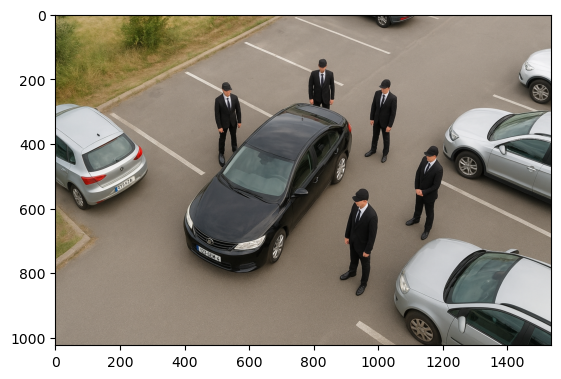

In [ ]:
img_path = '../images/car/chatGPT_shadybusiness_zoomhigh-custom.tif'
img = tiff.imread(img_path)

_ = plt.imshow(img)

# From the image below, you can estimate the 
# coordinates of the license plate.


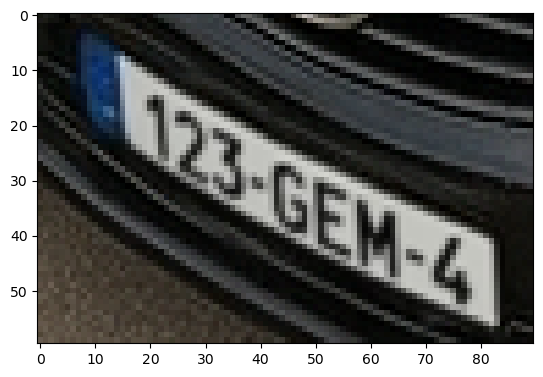

In [13]:
_ = plt.imshow(img[710:770, 430:520])

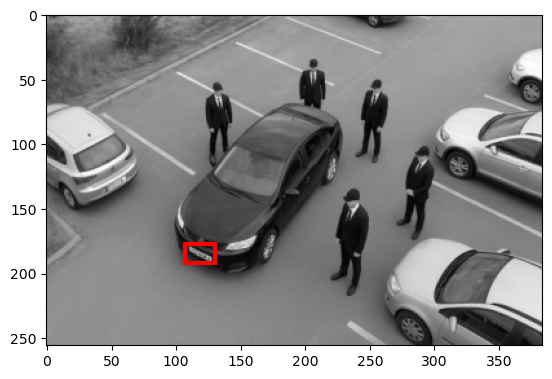

In [56]:
image_path2 = '../images/car/chatGPT_shadybusiness_zoomlow-8bit.tif'

img_small = tiff.imread(image_path2)
fig, ax = plt.subplots()
_= ax.imshow(img_small, cmap='grey')
rect = plt.Rectangle((107,177), 23, 15,
                     # (x, y), width, height
                  linewidth=3, edgecolor='r', 
                  facecolor='none')
_ = ax.add_patch(rect)

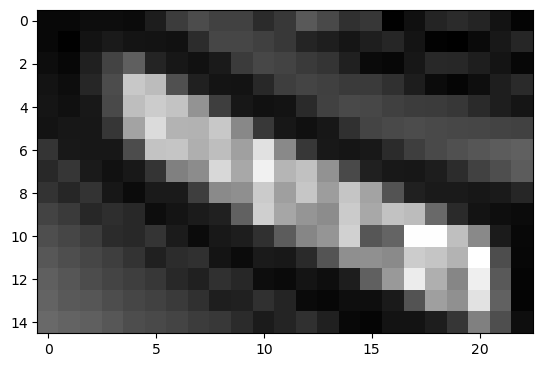

In [20]:
_ = plt.imshow(img_small[710//4:770//4, 430//4:520//4], cmap='grey')

Clearly, there is not enough information in this image to read the license plate.

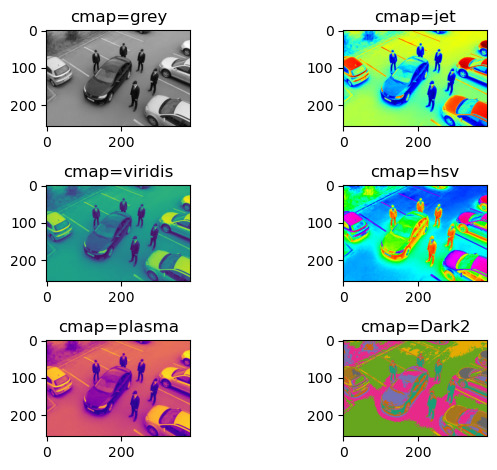

In [65]:
# Different cmaps
# Google for "python cmap"
# Find: https://matplotlib.org/stable/users/explain/colors/colormaps.html

fig, ax = plt.subplots(3,2)
_= ax[0,0].imshow(img_small, cmap='grey')
_= ax[0,0].set_title('cmap=grey')
_= ax[1,0].imshow(img_small, cmap='viridis')
_= ax[1,0].set_title('cmap=viridis')
_= ax[2,0].imshow(img_small, cmap='plasma')
_= ax[2,0].set_title('cmap=plasma')
_= ax[0,1].imshow(img_small, cmap='jet')
_= ax[0,1].set_title('cmap=jet')
_= ax[1,1].imshow(img_small, cmap='hsv')
_= ax[1,1].set_title('cmap=hsv')
_= ax[2,1].imshow(img_small, cmap='Dark2')
_= ax[2,1].set_title('cmap=Dark2')
plt.tight_layout()

#### Perceptually uniform

Note that `viridis` and `plasma` are *perceptually uniform* color maps, meaning that a specific value difference will look the same indepedent of the location on the scale.

This is an important feature, as otherwise you might see contrasts that are not really there.

#### Adding 100

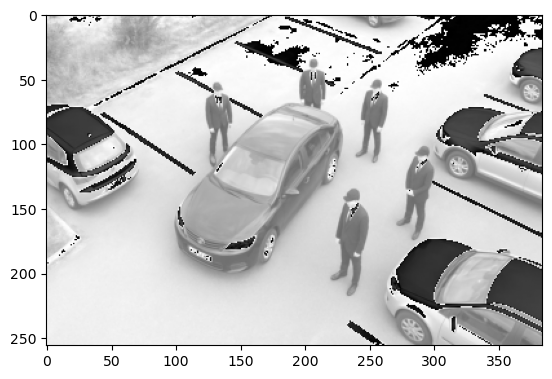

In [73]:
img_small_plus100 = img_small+100
_=plt.imshow(img_small_plus100, cmap='grey')

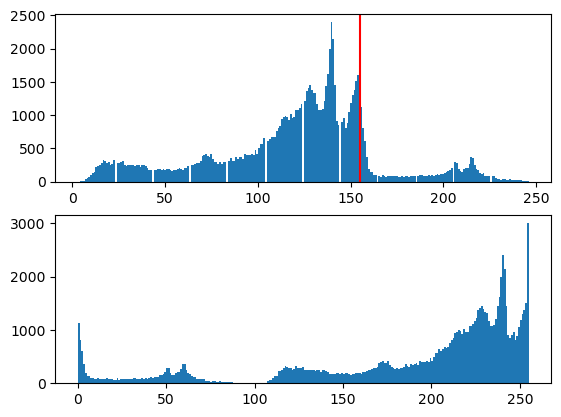

In [74]:
fig, ax = plt.subplots(2,1)
_=ax[0].hist(img_small.ravel(), bins=255)
_=ax[0].axvline(x=255-100, color='r', linestyle='-')
_=ax[1].hist(img_small_plus100.ravel(), bins=255)

The values can only take values between 0-255, so if we add 100, values >255 are put back in that scale in a periodic fashion. (E.g. 160+100 = 4, or 260-256, consistent with there only being 256 values available.)

### Additional exercises

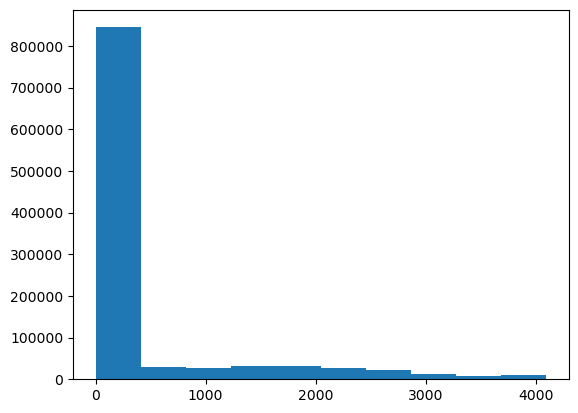

In [47]:
# Read the KTR image
img_path_KTR = '/Users/m.wehrens/Data_notbacked/2025_Py-Image-workshop_KTR-example-data/raw/Composite_KTR.tif'
img_KTR = tiff.imread(img_path_KTR)

# Display a histrogram of the first channel (t=0)
_ = plt.hist(img_KTR[0,0,:,:].ravel())

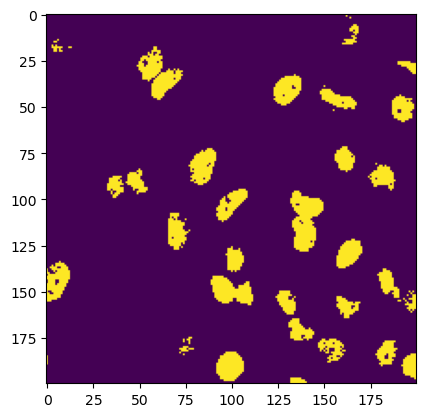

In [ ]:
# Determine a threshold, based on the histogram
MY_THRESHOLD = 2000

# Display the binary thresholed image
img_nuclei = img_KTR[0,0,0:200,0:200]
_ = plt.imshow(img_nuclei>MY_THRESHOLD)

# Save the mask
img_nuclei_thresholded = \
    img_nuclei>MY_THRESHOLD

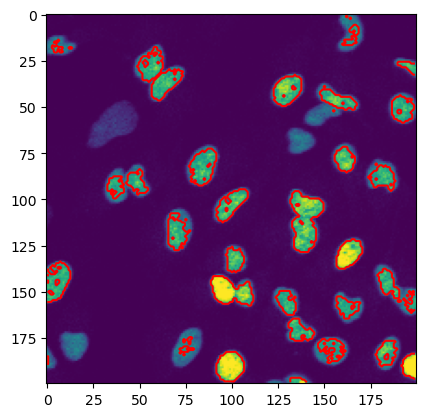

In [48]:
# Display both the original nuclei and the mask
_ = plt.imshow(img_nuclei)
_ = plt.contour(img_nuclei_thresholded, 
                levels=[0.5], colors='red')
                # levels determines at which level to draw isolines

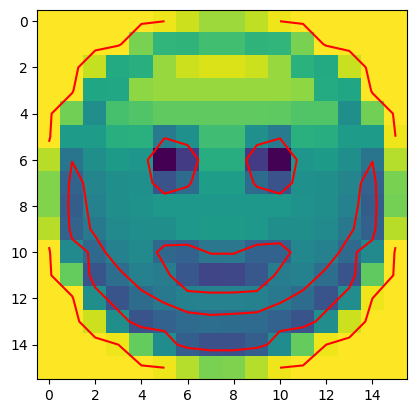

In [55]:
# Additional contour example

# Load the :-) image
image_path_smile = '../images/emoji/emoji-8bit-gray.tif'
img_smile = tiff.imread(image_path_smile)

# Show the image and contours
_ = plt.imshow(img_smile)
_ = plt.contour(img_smile, levels=[150,250], colors='red')